# Simulations using State Variable Models

## Two Mass-Spring-Damper System

We can model a system using state variable models. We will start by modeling the two mass-spring-damper system shown below.

<img width="33%" src="figures/TwoMassSpringDamper_force.png" alt="Two mass-spring-damper"/>

The equations of motion for this system are:

$m_1 \ddot{p}=-c_1(\dot{p}-\dot{q})-k_1(p-q)+u$

$m_2 \ddot{q}= c_1(\dot{p}-\dot{q})+k_1(p-q)-c_2\dot{q}-k_2q=c_1\dot{p}+k_1p-(c_1+c_2)\dot{q}-(k_1+k_2)q$

This system has two equations of motion and each is a second-order equation. In general, equation order cooresponds to number of state variables needed. Therefore, each equation has two state variables (for a total of four).

When we write this in matrix form, we get:

$$
\boldsymbol{\dot{x}}=
\begin{bmatrix}
0 & 1 & 0 & 0\\
-\frac{k_1}{m_1} & -\frac{c_1}{m_1} & \frac{k_1}{m_1} & \frac{c_1}{m_1}\\
0 & 0 & 0 & 1\\
\frac{k_1}{m_2} & \frac{c_1}{m_2} & -\frac{k_1+k_2}{m_2} & -\frac{c_1+c_2}{m_2}\\
\end{bmatrix}
\boldsymbol{x}
+
\begin{bmatrix}
0\\
\frac{1}{m_1}\\
0\\
0
\end{bmatrix}
u
$$

Assuming we only care about the postions of $m_1$ and $m_2$, the output of the system is:

$$
y=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0
\end{bmatrix}
\boldsymbol{x}
+
\begin{bmatrix}
0\\
0
\end{bmatrix}
u
$$

With that out of the way, on to the fun. Coding!

As always with python, start by importing all of the packages that you will need.

In [1]:
import numpy as np # basic package for doing math with arrays (a bunch of numbers)
import matplotlib.pyplot as plt # basic plotting package
import control # control system tools

Then we need to construct our state space system. Let's define some arbitrary parameter values, because this is a simple theoretical example system and the specific values aren't that vital.

In [2]:
# arbitrary parameters
k1 = 20 # N/m
k2 = 60 # N/m
c1 = 0.5 # N-s/m
c2 = 4 # N-s/m
m1 = 3 # kg
m2 = 6 # kg

To construct the state space system, we need the four matrices, $A$, $B$, $C$, $D$. We will use a numpy matrix. Pay close attention to how the numpy matrix is constructed.

In [3]:
A = np.matrix([
             [0, 1, 0, 0],
             [-k1/m1, -c1/m1, k1/m1, c1/m1],
             [0, 0, 0, 1],
             [k1/m2, c1/m2, -(k1+k2)/m2, -(c1+c2)/m2]
             ])

The A matrix needs to be a square. Since we have four states, we need a 4x4 matrix. Note that we have 4 bracketed arrays of numbers each with 4 comma separated values in them.

In [4]:
B = np.matrix([
             [0],
             [1/m1],
             [0],
             [0]
             ])

The $B$ matrix gets it's shape from the number of states and inputs. We have 4 states and one input ($u(t)$), so this matrix is 4x1.

In [5]:
C = np.matrix([
             [1, 0, 0, 0],
             [0, 0, 1, 0]
             ])

We want 2 outputs, $p$ and $q$, and have 4 states. So the $C$ matrix is 2x4.

In [6]:
D = np.matrix([
             [0],
             [0]
             ])

Finally, we want 2 outputs and have 1 input, so the $D$ matrix is 2x1.

Now we can have the control systems toolbox put this together. We can then get the step response just like we did for the DC motor. In this case, the step input is a force input from $0$ to $1$ Newton. (Remember that the input to our mass-spring-damper system is a force.)

In [7]:
# generate the python representation of the state space model
sys = control.StateSpace(A, B, C, D)

# define time samples over which to simulate your system
time = np.arange(0,20,0.1) # np.arange(start_time,end_time,time_spacing)

# ouput and time over which the system was simulated ('t' is not so important since we're giving 'time')
t, output_matrix = control.step_response(sys, T=time, squeeze=True)

# note that since we had two outputs, 'output_matrix' is a numpy matrix with shape 2x200
print(np.shape(output_matrix))

(2, 200)


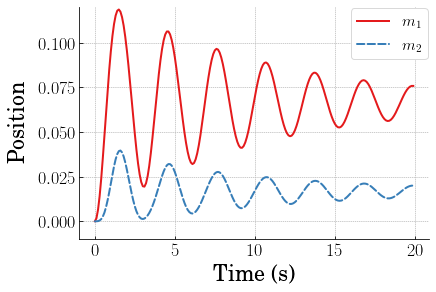

In [8]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', fontsize=22, weight='bold', labelpad=10)

# data to be plotted
plt.plot(time, output_matrix[0,:], linewidth=2, linestyle='-', label=r'$m_1$')
plt.plot(time, output_matrix[1,:], linewidth=2, linestyle='--', label=r'$m_2$')
# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-0.01,0.12)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

# plt.show()

So we get two position responses because we have two masses.

A fun thing about state space models is the ability to simulate them with initial conditions on the states, in this case initial positions and velocities of the two masses. This is done very similarly to the step response where this time we use `control.initial_response`. The initial conditions need to be assigned in the order cooresponding to the order of the states in our system definition. In our case, $\boldsymbol{x}=[p,\dot{p},q,\dot{q}]^T$.

In [9]:
# define the initial conditions
x_init = [1,0,-1,0] # [p, p_dot, q, q_dot]

# pass the system 'sys', time 'time', and initial conditions 'x_init' to the 'initial response' function
t, p_out_initial = control.initial_response(sys,T=time, X0=x_init,squeeze=True)

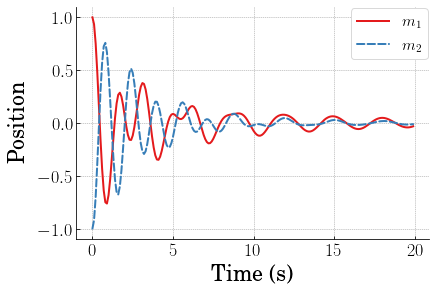

In [10]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', fontsize=22, weight='bold', labelpad=10)

plt.plot(time, p_out_initial[0,:], linewidth=2, linestyle='-', label=r'$m_1$')
plt.plot(time, p_out_initial[1,:], linewidth=2, linestyle='--', label=r'$m_2$')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,0.15)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

# plt.show()

In this case with these initial conditions, the response is a little more interesting to look at and we can see at points where the motion of one of the masses influences the response of the other.

## Pendulum with Force Input

Let's now look at modeling the state space form for the pendulum below.

<img width="33%" src="figures/Bar_pendulum_with_force.png" alt="Pendulum with force"/>

The force $f(t)$ is always horizontal. The equation of motion for this system is:

$I\ddot{\theta}=lf(t)\cos(\theta) - mg\frac{l}{2}\sin(\theta)$

To put this into state-space form, the equation must be linearized. Linearize about $\theta=0$.

$I\ddot{\theta}=lf(t) - mg\frac{l}{2}\theta$

Since this is a second-order system, we will need two states.

$$\boldsymbol{x}=
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
=
\begin{bmatrix}
\theta\\
\dot{\theta}
\end{bmatrix}
$$

The derivative of the state vector is:

$$\dot{\boldsymbol{x}}=
\begin{bmatrix}
\dot{x}_1\\
\dot{x}_2
\end{bmatrix}
=
\begin{bmatrix}
\dot{\theta}\\
\ddot{\theta}
\end{bmatrix}
$$

Plug in the equation of motion for $\ddot{\theta}$ and replace all $\theta$ and $\dot{\theta}$ with $x_1$ and $x_2$ where appropriate according to our state vector.

$$\dot{\boldsymbol{x}}=
\begin{bmatrix}
\dot{x}_1\\
\dot{x}_2
\end{bmatrix}
=
\begin{bmatrix}
\dot{\theta}\\
-\frac{mgl}{2I}\theta + \frac{lf(t)}{I}
\end{bmatrix}
=
\begin{bmatrix}
x_2\\
-\frac{mgl}{2I}x_1 + \frac{lf(t)}{I}
\end{bmatrix}
$$

Converting this to matrix form gives:

$$\dot{\boldsymbol{x}}=
\begin{bmatrix}
0 & 1\\
-\frac{mgl}{2I} & 0
\end{bmatrix}
\boldsymbol{x}
+
\begin{bmatrix}
0\\
\frac{l}{I}
\end{bmatrix}
f(t)
$$

Assuming for the output that we want both states:

$$
\boldsymbol{y}=
\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}
\boldsymbol{x}
+
\begin{bmatrix}
0\\
0
\end{bmatrix}
f
$$

Now we can code this.

In [11]:
m = 1 #kg
l = 2 #m
I = 1/3*m*l**2
g = 9.8 #m/s^2


A = np.matrix([
             [0, 1],
             [-(m*g*l)/(2*I), 0],
             ])

B = np.matrix([
             [0],
             [l/I],
             ])

C = np.matrix([
             [1, 0],
             [0, 1]
             ])

D = np.matrix([
             [0],
             [0]
             ])